# Project: No-show appointments Dataset Analysis.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> "No-show appointments Datataset" collects informations about medical appointments in Brazil in approach to predict the probability of a patient to attend appointment through 14 different features provided in this dataset.

>The main focus of this study is to find trends among the patients who didn't attend their appointments and how they differed from those who did.

### Content:
> most of columns names are self explanatory,
<ul>
    <li>'ScheduledDay' tells us on what day the patient set up their appointment.</li>
    <li>'Neighborhood' indicates the location of the hospital.</li>
    <li>'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>'SMS_received' indicates if 1 or more messages sent to the patient.</li>
    <li>'No-show' Yes if the patient didn't attend the apointment and No if he did.</li>
</ul>

### "if the patient show-up or no-show to the appointment"
>this will be the main dependent feature in this investigation.

#### Other independent variables to study are:
<ul>
    <li> Gender of patients</li>
    <li> Age of patients</li>
    <li> Appointment Date</li>
</ul>

#### Questions to explore:
<ul>
    <li>What is the percentage of patients attended their appointments?</li>
    <li>Which gender cares more about health care & How is gender associated with attending appointment?</li>
    <li>Which age category skipped their appointment the most?</li>
    <li>Which day of the week has the least apointments?</li>
    <li>How does the waiting period between start and end affect appointment attendance?</li>
    <li>What is the most common health issue in this dataset?</li>
</ul>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib inline
%matplotlib inline

#font size for plots
plt.rcParams['font.size'] = '16'

# choosing style from seaborn library
sns.set_style("whitegrid")

<a id='wrangling'></a>
## Data Wrangling

### Data Reading

In [41]:
#read data csv
df = pd.read_csv('no_show.csv', parse_dates=True)

### Data Inspection

In [42]:
#view sample
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [43]:
#counts of rows and columns
df.shape

(110527, 14)

In [44]:
# information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>data contains 110527 row 14 columns.

>no null data found in any of columns.

>"AppointmentDay" & "ScheduledDay" columns not parsed as datetime type.

In [45]:
#check for duplicates
df.duplicated().any()

False

>no duplicates found

In [46]:
#checking values of columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>ScheduledDay has too many unique values than AppointmentDay.

>Handcap values should be true or false according to kaggle documentation, but it has 5 unique values.

>data seems to be clean.

In [47]:
# basic descriptive analysis
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Descriptive analysis observations:
><ul>
    <li>avarage age is 37, min age -1 could be typo or wrong and max age 115 might be outlier.</li>
    <li>less than 1% have Bolsa Família scholarship.</li>
    <li>about 20% with hipertension, 7% with diabetes & 3% alcoholism.</li>
    <li>more than 30% received 1 or more confirmation message.</li>
    <li>changing the values of "Gender" & "No-show" columns to (0,1) instead of strings would be helpful for descriptive analysis.</li>
   </ul>

### Data Cleaning

#### Drop irrelevant columns

In [48]:
# AppointmentID is unique for each row and isn't necessary for analysing dataset
df.drop(columns=["AppointmentID"], inplace=True)

#### Clean columns labels

In [49]:
# change columns names to lower
df.columns = df.columns.str.lower()

# further cleaning
df.rename(columns={"patientid": "patient_id",
                   "scheduledday": "scheduled_day",
                   "appointmentday": "appointment_day",
                   "handcap": "handicap",
                   "no-show": "no_show"},
         inplace=True)

df.columns # check changes

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

#### Handle columns data types

In [50]:
def update_values(col):
    """
    change values then validate changes,
    used for gender & no_show columns
    """
    old_values = df[col].unique()
    old_counts = df[col].value_counts()
    
    df[col] = df[col].apply(lambda x: 0 if x == old_values[0] else 1)
    
    new_counts = df[col].value_counts()
    
    return (new_counts.values == old_counts.values), new_counts, old_counts


In [51]:
# change gender values 'F' to 0 & 'M' to 1
update_values('gender')

(array([ True,  True], dtype=bool), 0    71840
 1    38687
 Name: gender, dtype: int64, F    71840
 M    38687
 Name: gender, dtype: int64)

In [52]:
# change no_show values 'No' to 0 & 'Yes' to 1
update_values('no_show')

(array([ True,  True], dtype=bool), 0    88208
 1    22319
 Name: no_show, dtype: int64, No     88208
 Yes    22319
 Name: no_show, dtype: int64)

In [53]:
# scheduled_day to datetime
df.scheduled_day = pd.to_datetime(df.scheduled_day)

# appointment_day to datetime
df.appointment_day = pd.to_datetime(df.appointment_day)

df.dtypes # check changes

patient_id                float64
gender                      int64
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                     int64
dtype: object

In [54]:
#### Review columns for odd values

In [55]:
# add waitting days colum
df['waiting_days'] = df.appointment_day.dt.date - df.scheduled_day.dt.date

df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
0,2.987250e+13,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days


In [56]:
#check if any appointment days is before its scheduled day
df[df.waiting_days < pd.Timedelta("0 days")]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
27033,7.839273e+12,1,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1 days
55226,7.896294e+12,0,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1 days
64175,2.425226e+13,0,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1 days
71533,9.982316e+14,0,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6 days
72362,3.787482e+12,1,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,1,-1 days


In [57]:
#drop rows with waitting time < 0
df = df[df.waiting_days >= pd.Timedelta("0 days")]

df.shape

(110522, 14)

In [58]:
# convert waiting days columns dtype to int
df.waiting_days = df.waiting_days.dt.days

df.waiting_days.dtype

dtype('int64')

In [59]:
# there is 1 patient with age < 0

p_id = df[df.age < 0].iat[0, 0] #get patient_id

df[df.patient_id == p_id] # check for other records with same id

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
99832,4.659432e+14,0,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0,0


In [60]:
# no other records so let's drop it
df = df[df.age >= 0]

df[df.age < 0] # confirm it was dropped

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days


In [61]:
# normalize handicap values to 0 or 1
df.handicap = df.handicap.apply(lambda x: 1 if x > 0 else 0)

df.handicap.unique()

array([0, 1])

In [62]:
# patient_id & scheduled_day columns are no longer required for analysis
df.drop(columns=['patient_id', 'scheduled_day'], inplace=True)

df.columns

Index(['gender', 'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'waiting_days'],
      dtype='object')

#### descriptive analysis after cleaning

In [63]:
df.describe()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,0.350024,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,0.201898,10.184345
std,0.476979,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,0.401419,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


>35% of patients are males.

>20% of patients skipped their appointments.

>avarage waitting time is 10 days with min to 0 & max to 179 but mostly in range 0 to 15 days.

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What is the percentage of patients attended their appointments?

In [64]:
# no_show value counts "0 = no, 1 = yes"
counts = df.no_show.value_counts()
counts

0    88207
1    22314
Name: no_show, dtype: int64

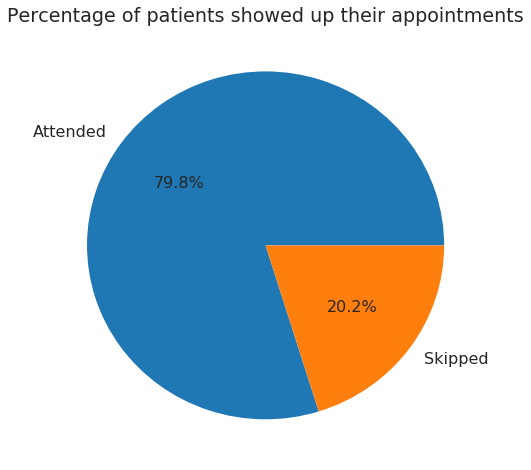

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(counts, labels=['Attended', 'Skipped'], autopct='%1.1f%%')
ax.set_title('Percentage of patients showed up their appointments')
plt.show();

> About 80% of patients attended their appointments.

### Question 2: Which gender cares more about health care & How is gender associated with attending appointment?

In [66]:
# Females & males counts "0 = 'F', 1= 'M'"
counts = df.gender.value_counts()
print(counts)

0    71836
1    38685
Name: gender, dtype: int64


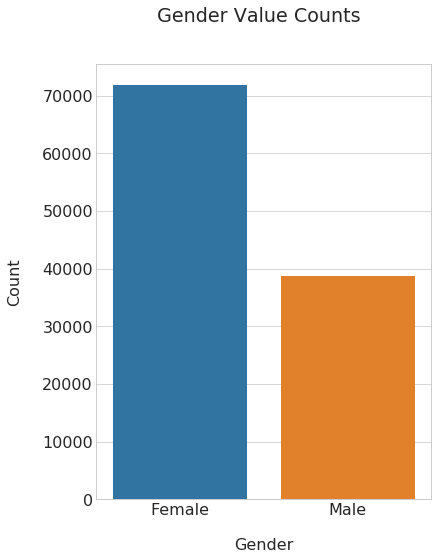

In [67]:
# results visualization
fig, ax = plt.subplots(figsize=(6,8))
     
sns.countplot(x=df.gender, ax= ax)
ax.set_xticklabels(['Female', 'Male'])
ax.set_xlabel('Gender', labelpad=20)
ax.set_ylabel("Count", labelpad=20)

fig.suptitle('Gender Value Counts')
plt.show();

>Females care more about healthcare than males.

In [68]:
# masks for males & femals in dataset
females = df[df.gender == 0]
males = df[df.gender == 1]

fcount = females.no_show.value_counts() # value_counts for females
mcount = males.no_show.value_counts()   # value_counts for males

print(f'Femals:\n{fcount}\nMales:\n{mcount}')

Femals:
0    57245
1    14591
Name: no_show, dtype: int64
Males:
0    30962
1     7723
Name: no_show, dtype: int64


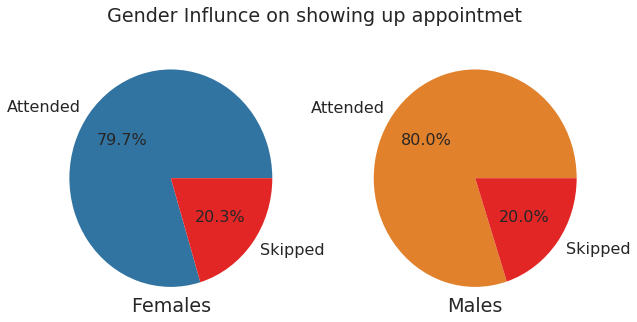

In [69]:
# results visualization
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
     
    
ax1.pie(fcount, labels=['Attended', 'Skipped'], autopct='%1.1f%%', colors=['#3274a1', '#e22626'])
ax1.set_title('Females', y=-0.01);

ax2.pie(mcount, labels=['Attended', 'Skipped'], autopct='%1.1f%%', colors=['#e1812c', '#e22626'])
ax2.set_title('Males', y=-0.01)

fig.suptitle('Gender Influnce on showing up appointmet')
plt.show();

> Percentage of Males and Females skipped their appointments almost equal which indicates that gender is irrelevant to attending appointment.

### Question 3: Which age category skipped their appointment the most?
> Age Categories according to <a><https://www.statcan.gc.ca/eng/concepts/definitions/age2/a>:
    <ul>
        <li>Children (00-14 years)</li>
        <li>Youth (15-24 years)</li>
        <li>Adults (25-64 years)</li>
        <li>Seniors (65 years and over)</li>
    </ul>

In [70]:
# function to convert age to category
def age2category(age):
    if age < 15: return 'Children'
    elif age < 24: return 'Youth'
    elif age < 65: return 'Adults'
    else: return 'Seniors'

In [71]:
df_age = df[['age', 'no_show']].copy()
df_age.age = df_age.age.apply(age2category)
print(df_age.groupby('age').no_show.value_counts())

age       no_show
Adults    0          48158
          1          11940
Children  0          18331
          1           4925
Seniors   0          12169
          1           2232
Youth     0           9549
          1           3217
Name: no_show, dtype: int64


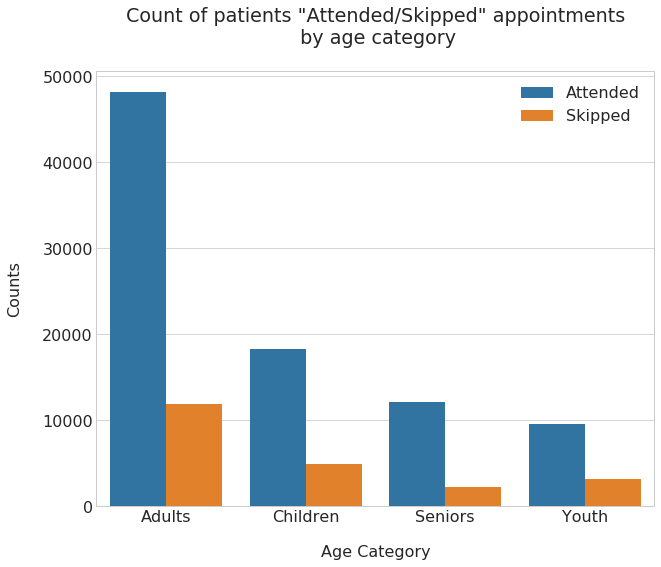

In [72]:
# results visualization
fig, ax  = plt.subplots(figsize=(10,8))

sns.countplot(x='age', hue='no_show', data=df_age, ax= ax)

ax.set_ylabel('Counts', labelpad=20)
ax.set_xlabel('Age Category', labelpad=20)
ax.set_title('Count of patients "Attended/Skipped" appointments\n by age category', y=1.05)
ax.legend(['Attended', 'Skipped'])
plt.show();

>Adults are the most age category skipped their appointments, however they also the most that attended.

>Seniors is the least category skipped their appointments also they seem to be the category with the highest percentage of attendance.

>However difference in "show / no show" doesn't seem to be critical among all categories.

### Question 4: Which day of the week has the least apointments?

In [35]:
# get day of week in new data frame
df_days = df[['appointment_day', 'no_show']].copy()
df_days['week_day'] = df_days['appointment_day'].dt.dayofweek

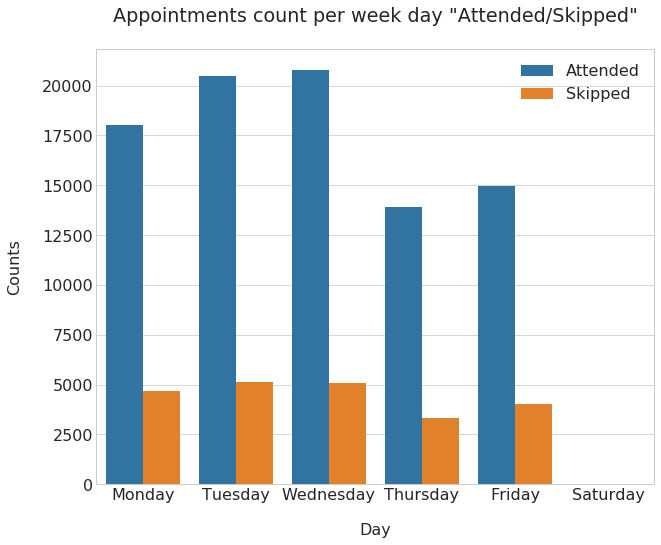

In [73]:
# results visualization
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
fig, ax  = plt.subplots(figsize=(10,8))

sns.countplot(x='week_day', hue='no_show', data=df_days, ax= ax)

ax.set_ylabel('Counts', labelpad=20)
ax.set_xlabel('Day', labelpad=20)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.set_title('Appointments count per week day "Attended/Skipped"', y=1.05)
ax.legend(['Attended', 'Skipped'])
plt.show();

In [74]:
#saturday value is very smaal to show on plot
counts = df_days.groupby('week_day').no_show.value_counts()
print(f'Saturday has: {counts[5]}\n')

Saturday has: no_show
0    30
1     9
Name: no_show, dtype: int64



>No appointments in Sunday, it might be day off.

>Saturday is the day with least appointments with 39 appointments.

>Wednesday & Tuesday are the days with most appointments.

>Day of the week doesn't seem to be critical feature for appointments attendance.

### Question 5: What is the most common health issue in this dataset?

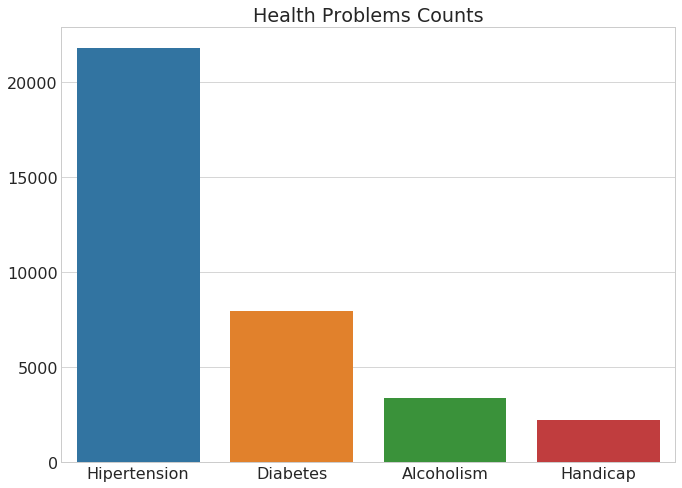

In [75]:
fig, ax = plt.subplots(figsize=(11,8))

ser = df[['hipertension', 'diabetes', 'alcoholism', 'handicap']].sum()

sns.barplot(x=ser.index, y=ser.values, ax=ax)

ax.set_xticklabels(ser.index.str.capitalize())
ax.set_title('Health Problems Counts')
plt.show();

>Hipertension is the most common health issue, with over 20k cases.

<a id='conclusions'></a>
## Conclusions
At the end of this study we could summarize the results of our in analysis in these points: 
<ul>
    <li>About 20% of patients skipped their appointments.</li>
    <li>Females presence within the data is about twice Males presence.</li>
    <li>Adults "25-64 years" are the largest portion of patients.</li>
    <li>Seniors (65 years and over) are the least to skip their appointments.</li>
    <li>The number of appointments increases at the beginning of the week, then gradually decreases until the end of the week.</li>
    <li>>Hipertension is the most common health issue, with over 20k cases.</li>
    <li>ِِAvarage waitting time for appointments is 10 days with min to 0 & max to 179 but mostly in range 0 to 15 days.</li>
    <li>Less than 1% have Bolsa Família scholarship.</li>
    <li>More than 30% received 1 or more confirmation message.</li>
</ul>
unfortunately we were unable to determine the critical features that indicates the probability of a patient to attend appointment.

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0